In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import re
from pathlib import Path

In [5]:
data_folder = Path("data-sets")
df = pd.read_csv(data_folder/"train.csv")
test = pd.read_csv(data_folder/"test.csv")

In [6]:
#Drop the column which is out of model scope
d_col = ['ID', 'Customer_ID', 'Month', 'Name', 'SSN', 'Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour',
        'Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Changed_Credit_Limit', 'Num_Credit_Inquiries',
        'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']
drop_df = df.drop(d_col , axis=1).copy()
drop_df

,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Credit_Score
0,3,7,809.98,26.822620,22 Years and 1 Months,Good
1,-1,NaN,809.98,31.944960,NaN,Good
2,3,7,809.98,28.609352,22 Years and 3 Months,Good
3,5,4,809.98,31.377862,22 Years and 4 Months,Good
4,6,NaN,809.98,24.797347,22 Years and 5 Months,Good
...,...,...,...,...,...,...
91987,19,12,1478.43,30.375542,17 Years and 7 Months,Standard
91988,19,10,1478.43,29.424609,17 Years and 8 Months,Standard
91989,19,10,1478.43,35.499579,17 Years and 9 Months,Standard
91990,19,11,1478.43,30.509495,17 Years and 10 Months,Standard


In [7]:
drop_df.isnull().sum()

Delay_from_due_date            0
Num_of_Delayed_Payment      6407
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          8308
Credit_Score                   0
dtype: int64

In [8]:
drop_na = drop_df.dropna().copy()

In [67]:
drop_na.head(10)

,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Credit_Score
0,3,7,809.98,26.822620,22 Years and 1 Months,Good
2,3,7,809.98,28.609352,22 Years and 3 Months,Good
3,5,4,809.98,31.377862,22 Years and 4 Months,Good
5,8,4,809.98,27.262259,22 Years and 6 Months,Good
6,3,8_,809.98,22.537593,22 Years and 7 Months,Good
8,3,4,605.03,24.464031,26 Years and 7 Months,Standard
9,7,1,605.03,38.550848,26 Years and 8 Months,Good
10,3,-1,605.03,33.224951,26 Years and 9 Months,Standard
11,3,3_,605.03,39.182656,26 Years and 10 Months,Good
12,3,1,605.03,34.977895,26 Years and 11 Months,Good


In [68]:
for i in drop_na:
  print('\n',i,drop_na[i].unique())


 Delay_from_due_date [ 3  5  8  7 13 10  0  4  1  9 11 -1 30 31 34 27 14  2 -2 16 17 15 23 22
 12 18 19 51 53 26 48 43 52 28 25 20 46 49 61 29 50 58 45  6 55 56 59 57
 54 62 67 36 41 21 24 65 33 32 39 47 42 60 64 35 44 38 -3 63 40 37 -5 -4
 66]

 Num_of_Delayed_Payment ['7' '4' '8_' '1' '-1' '3_' '0' '8' '6' '5' '3' '9' '12' '15' '17' '2'
 '2_' '14' '11' '20' '22' '10' '13' '13_' '14_' '16' '12_' '18' '19' '23'
 '24' '21' '3318' '3083' '22_' '1338' '4_' '26' '11_' '3104' '25' '10_'
 '183_' '9_' '1106' '834' '19_' '24_' '23_' '2672' '20_' '2008' '-3' '538'
 '6_' '1_' '16_' '27' '-2' '3478' '2420' '15_' '707' '26_' '18_' '28'
 '17_' '5_' '1867' '2250' '1463' '7_' '4126' '2882' '1941' '2655' '2628'
 '132' '3069' '306' '0_' '3539' '3684' '1823' '4128' '1946' '827' '2297'
 '2566' '904' '929' '3568' '2503' '1552' '2812' '1697' '851' '3905' '923'
 '88' '1668' '3253' '808' '21_' '2689' '3858' '642' '3457' '1402' '1732'
 '3154' '847' '3037' '3103' '1063' '2056' '1282' '1841' '2569_' '25_'
 '21

In [9]:
# Revise the incorrect data whole table
sym = "\\`*_{}[]()>#@+!$:;"
col_int = ['Delay_from_due_date','Num_of_Delayed_Payment','Outstanding_Debt']
col_str = ['Credit_Score', 'Credit_History_Age']
for i in col_int:
  for c in sym:
    drop_na[i] = drop_na[i].astype(str).str.replace(c,'')
for i in col_str:
  for c in sym:
    drop_na[i] = drop_na[i].replace(c,'')
drop_na.head()

,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Credit_Score
0,3,7,809.98,26.822620,22 Years and 1 Months,Good
2,3,7,809.98,28.609352,22 Years and 3 Months,Good
3,5,4,809.98,31.377862,22 Years and 4 Months,Good
5,8,4,809.98,27.262259,22 Years and 6 Months,Good
6,3,8,809.98,22.537593,22 Years and 7 Months,Good


In [10]:
#Transform the information to the value
drop_na['Credit_History_Age'] = drop_na['Credit_History_Age'].astype(str).str.replace(' Years and ','.')
drop_na['Credit_History_Age'] = drop_na['Credit_History_Age'].astype(str).str.replace('Months','')

In [11]:
#Transform the object data the be float data type 
col_int2 = ['Delay_from_due_date','Num_of_Delayed_Payment','Outstanding_Debt','Credit_History_Age']
for i in col_int2:
  drop_na[i] = drop_na[i].astype(float)
drop_na.dtypes

Delay_from_due_date         float64
Num_of_Delayed_Payment      float64
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Credit_Score                 object
dtype: object

In [12]:
df_cleaned = drop_na

In [13]:
df_cleaned.describe()

,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age
count,77867.000000,77867.000000,77867.000000,77867.000000,77867.000000
mean,21.084465,30.778212,1429.706293,32.300418,18.350704
std,14.912149,224.831938,1155.124650,5.114878,8.323948
min,-5.000000,-3.000000,0.540000,20.172942,0.100000
25%,10.000000,9.000000,570.250000,28.071566,12.000000
50%,18.000000,14.000000,1169.990000,32.340457,18.200000
75%,28.000000,18.000000,1951.580000,36.502279,25.100000
max,67.000000,4397.000000,4998.070000,50.000000,33.800000


In [14]:
df_cleaned

,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Credit_Score
0,3.0,7.0,809.98,26.822620,22.10,Good
2,3.0,7.0,809.98,28.609352,22.30,Good
3,5.0,4.0,809.98,31.377862,22.40,Good
5,8.0,4.0,809.98,27.262259,22.60,Good
6,3.0,8.0,809.98,22.537593,22.70,Good
...,...,...,...,...,...,...
91987,19.0,12.0,1478.43,30.375542,17.70,Standard
91988,19.0,10.0,1478.43,29.424609,17.80,Standard
91989,19.0,10.0,1478.43,35.499579,17.90,Standard
91990,19.0,11.0,1478.43,30.509495,17.10,Standard


In [85]:
Q1 = df_cleaned.Credit_History_Age.quantile(0.25)
Q3 = df_cleaned.Credit_History_Age.quantile(0.75)
IQR = Q3 - Q1
df_cleaned = df_cleaned.drop(df_cleaned.loc[df_cleaned['Credit_History_Age'] > (Q3 + 1.5 * IQR)].index)
df_cleaned = df_cleaned.drop(df_cleaned.loc[df_cleaned['Credit_History_Age'] < (Q1 - 1.5 * IQR)].index)

In [84]:
Q1 = df_cleaned.Credit_Utilization_Ratio.quantile(0.25)
Q3 = df_cleaned.Credit_Utilization_Ratio.quantile(0.75)
IQR = Q3 - Q1
df_cleaned = df_cleaned.drop(df_cleaned.loc[df_cleaned['Credit_Utilization_Ratio'] > (Q3 + 1.5 * IQR)].index)
df_cleaned = df_cleaned.drop(df_cleaned.loc[df_cleaned['Credit_Utilization_Ratio'] < (Q1 - 1.5 * IQR)].index)

In [ ]:
Q1 = df_cleaned.Delay_from_due_date.quantile(0.25)
Q3 = df_cleaned.Delay_from_due_date.quantile(0.75)
IQR = Q3 - Q1
df_cleaned = df_cleaned.drop(df_cleaned.loc[df_cleaned['Delay_from_due_date'] > (Q3 + 1.5 * IQR)].index)
df_cleaned = df_cleaned.drop(df_cleaned.loc[df_cleaned['Delay_from_due_date'] < (Q1 - 1.5 * IQR)].index)

In [78]:
Q1 = df_cleaned.Outstanding_Debt.quantile(0.25)
Q3 = df_cleaned.Outstanding_Debt.quantile(0.75)
IQR = Q3 - Q1
df_cleaned = df_cleaned.drop(df_cleaned.loc[df_cleaned['Outstanding_Debt'] > (Q3 + 1.5 * IQR)].index)
df_cleaned = df_cleaned.drop(df_cleaned.loc[df_cleaned['Outstanding_Debt'] < (Q1 - 1.5 * IQR)].index)

In [79]:
Q1 = df_cleaned.Num_of_Delayed_Payment.quantile(0.25)
Q3 = df_cleaned.Num_of_Delayed_Payment.quantile(0.75)
IQR = Q3 - Q1
df_cleaned = df_cleaned.drop(df_cleaned.loc[df_cleaned['Num_of_Delayed_Payment'] > (Q3 + 1.5 * IQR)].index)
df_cleaned = df_cleaned.drop(df_cleaned.loc[df_cleaned['Num_of_Delayed_Payment'] < (Q1 - 1.5 * IQR)].index)

<Axes: xlabel='Num_of_Delayed_Payment'>

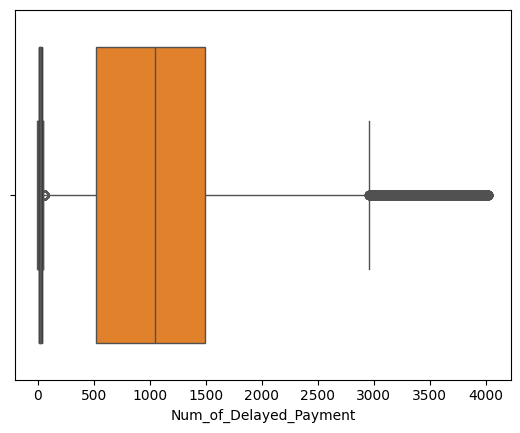

In [86]:
sns.boxplot(x=df_cleaned['Num_of_Delayed_Payment'])

<Axes: xlabel='Credit_History_Age'>

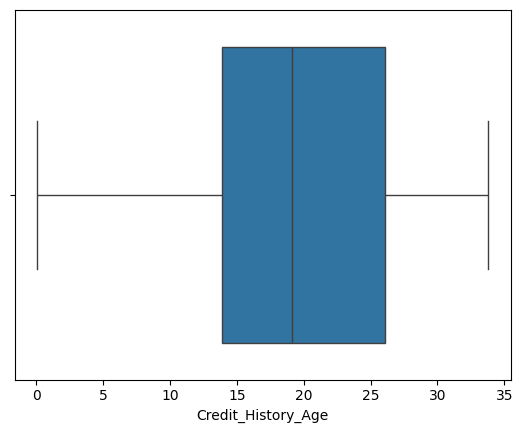

In [88]:
sns.boxplot(x=df_cleaned['Credit_History_Age'])

<Axes: xlabel='Credit_Utilization_Ratio'>

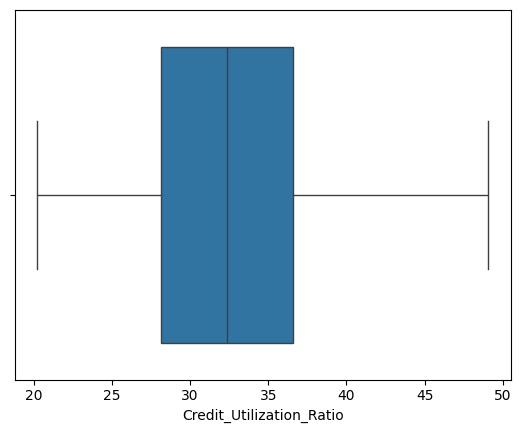

In [89]:
sns.boxplot(x=df_cleaned['Credit_Utilization_Ratio'])

<Axes: xlabel='Outstanding_Debt'>

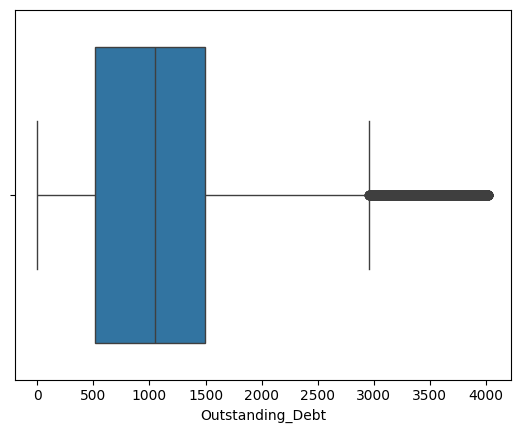

In [90]:
sns.boxplot(x=df_cleaned['Outstanding_Debt'])

<Axes: xlabel='Delay_from_due_date'>

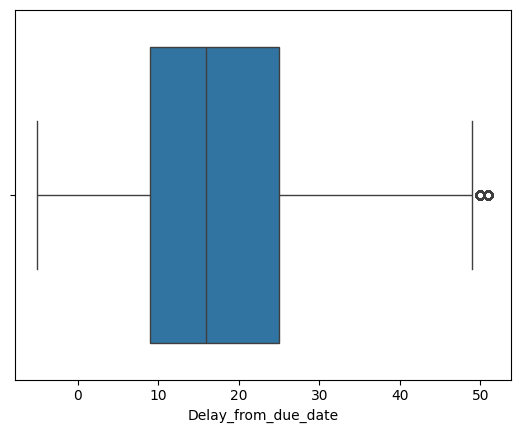

In [91]:
sns.boxplot(x=df_cleaned['Delay_from_due_date'])

array([[<Axes: title={'center': 'Delay_from_due_date'}>,
        <Axes: title={'center': 'Num_of_Delayed_Payment'}>],
       [<Axes: title={'center': 'Outstanding_Debt'}>,
        <Axes: title={'center': 'Credit_Utilization_Ratio'}>],
       [<Axes: title={'center': 'Credit_History_Age'}>, <Axes: >]],
      dtype=object)

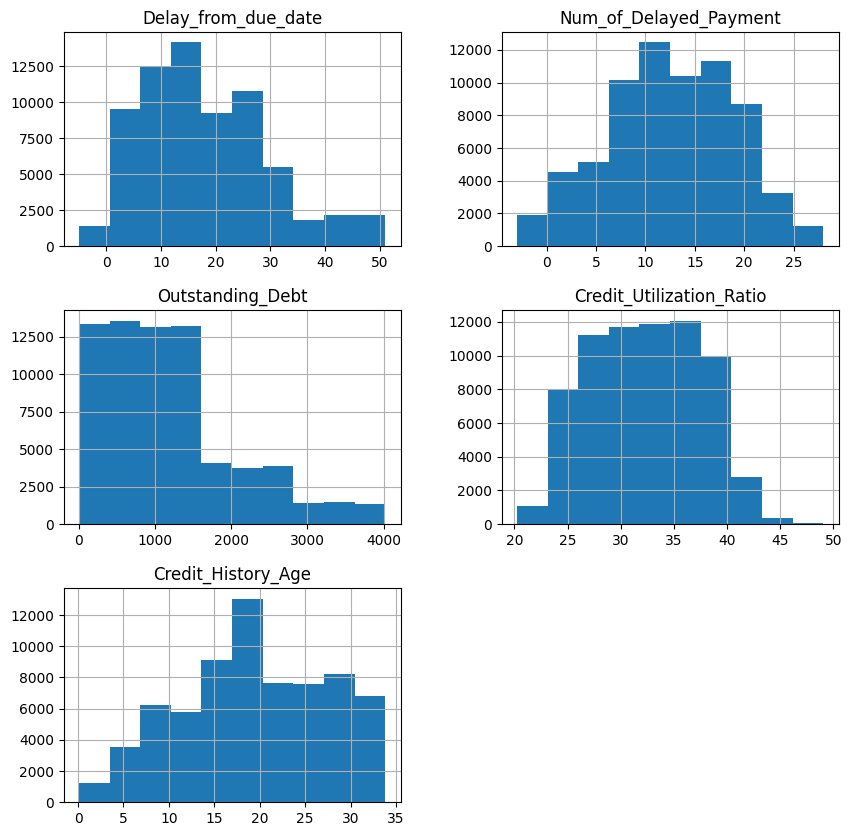

In [92]:
df_cleaned.hist(figsize=(10, 10))

In [93]:
df_cleaned.dtypes

Delay_from_due_date         float64
Num_of_Delayed_Payment      float64
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Credit_Score                 object
dtype: object

Accuracy: 0.570437909336073
Confusion Matrix:
 [[1851 2637   72]
 [1238 6607  368]
 [  50 2325  426]]
Classification Report:
               precision    recall  f1-score   support

           1       0.59      0.41      0.48      4560
           2       0.57      0.80      0.67      8213
           3       0.49      0.15      0.23      2801

    accuracy                           0.57     15574
   macro avg       0.55      0.45      0.46     15574
weighted avg       0.56      0.57      0.53     15574



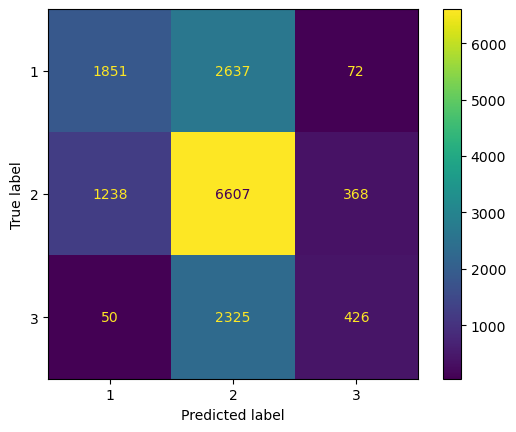

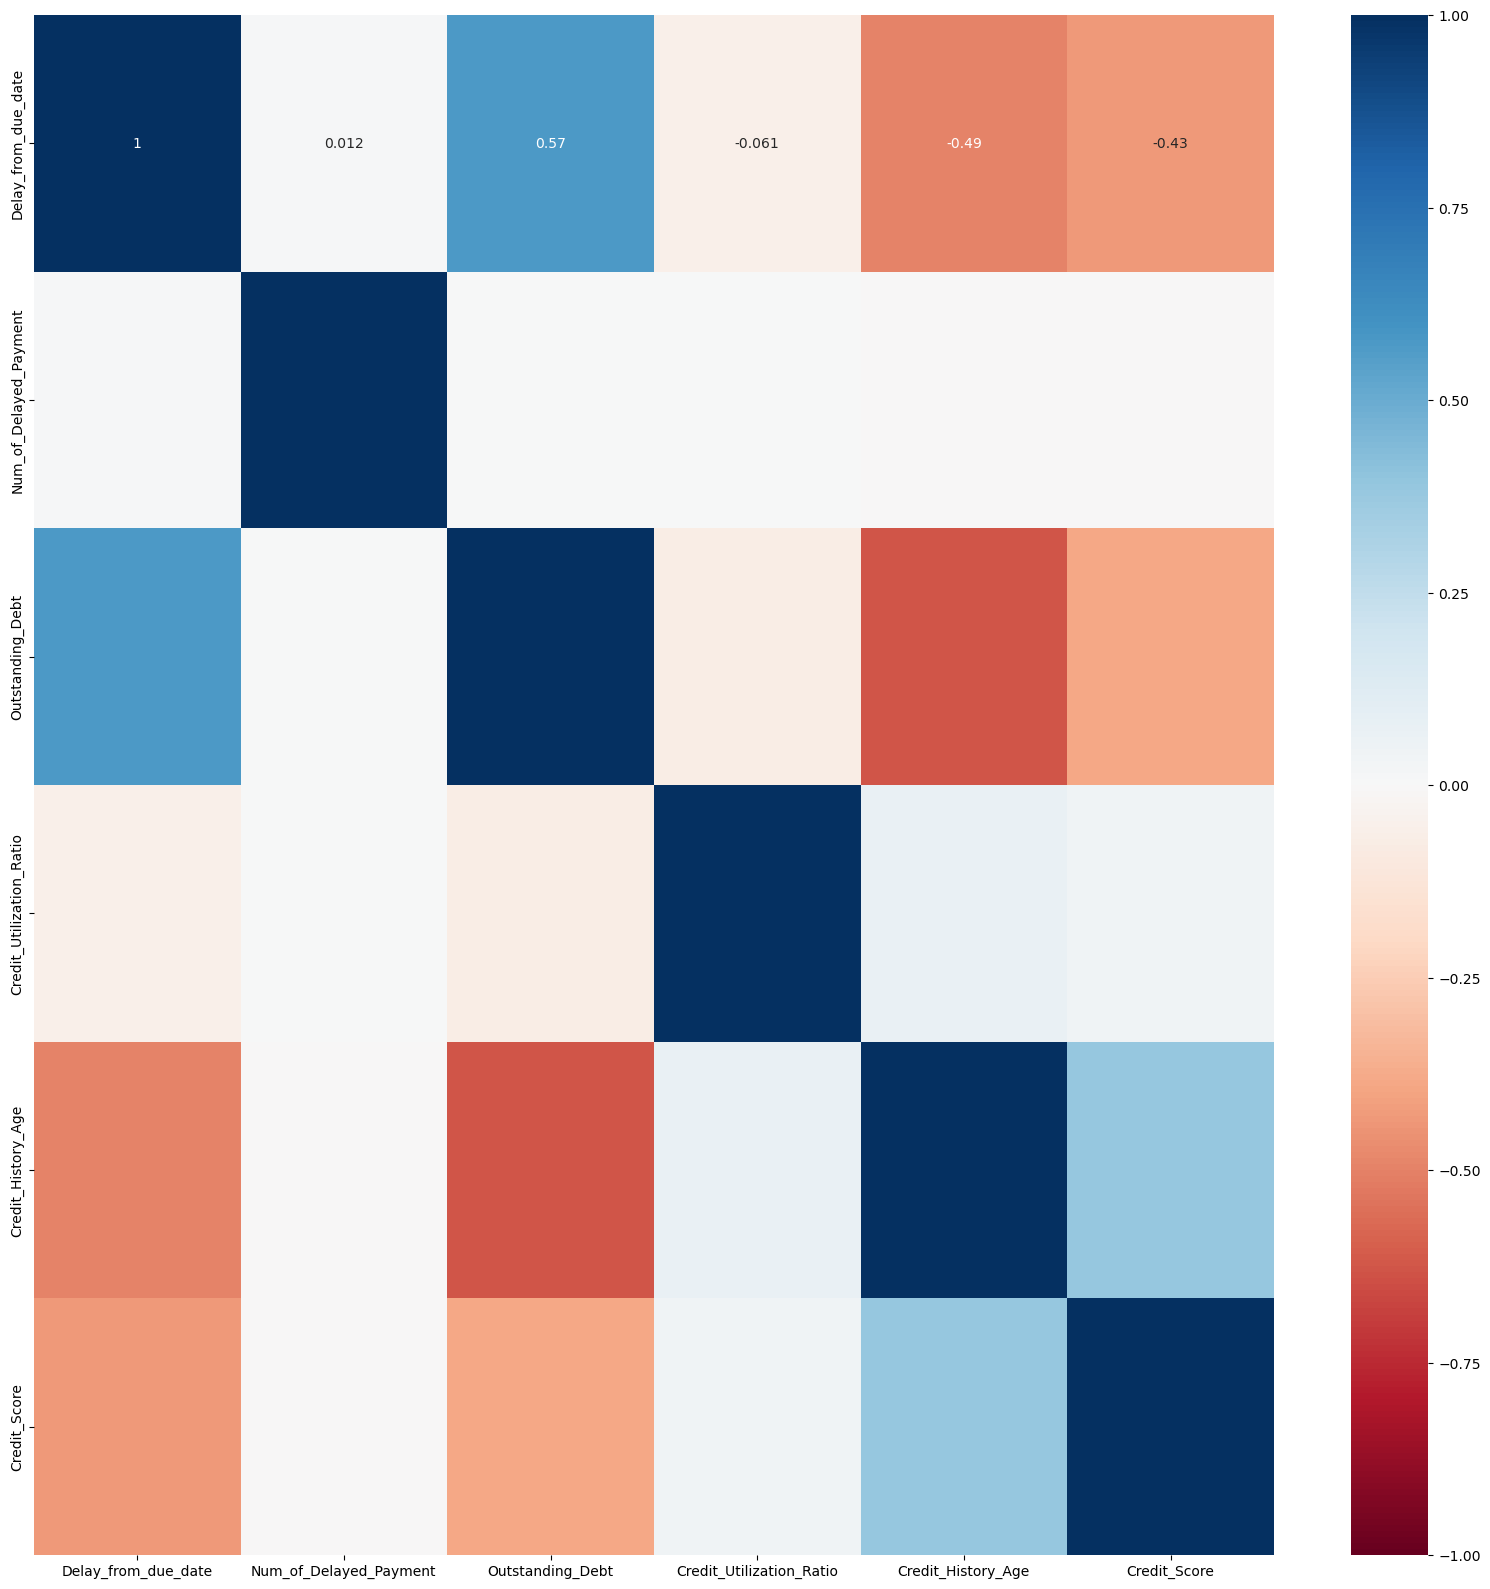

In [17]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Map credit scores to number
creditScoreMap = {'Poor': 1, 'Standard': 2, 'Good': 3}
df_cleaned['Credit_Score'] = df_cleaned['Credit_Score'].replace(creditScoreMap)


data = df_cleaned.copy()


# Separate features (X) and target variable (y)
X = data.drop(columns=['Credit_Score'])
y = data['Credit_Score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a multiclass logistic regression model
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=2000)

# Fit the model on the training data
logreg.fit(X_train, y_train)

# Make predictions on the test data
predictions = logreg.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", classification_report(y_test, predictions))

ConfusionMatrixDisplay(cm,display_labels=logreg.classes_).plot()
plt.grid(False)
# plt.show()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(20, 20))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, center=0, annot=True, cmap='RdBu')
plt.show()